In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

In [2]:
df = pd.read_csv('5_Data.csv',encoding='cp1252')

C:\Users\hp\AppData\Local\Temp\ipykernel_9552\3985719872.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('5_Data.csv',encoding='cp1252')


In [3]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

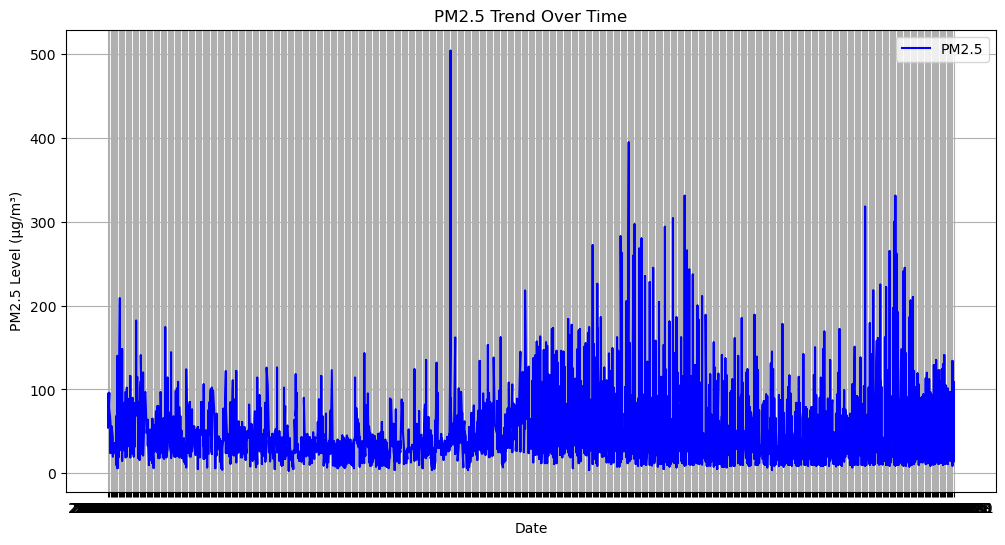

In [6]:
# Filter the dataset to remove NaN values for PM2.5 and sort by date
df_pm25 = df[['date', 'pm2_5']].dropna().sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(df_pm25['date'], df_pm25['pm2_5'], color='blue', label='PM2.5')
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level (µg/m³)')
plt.legend()
plt.grid()
plt.show()


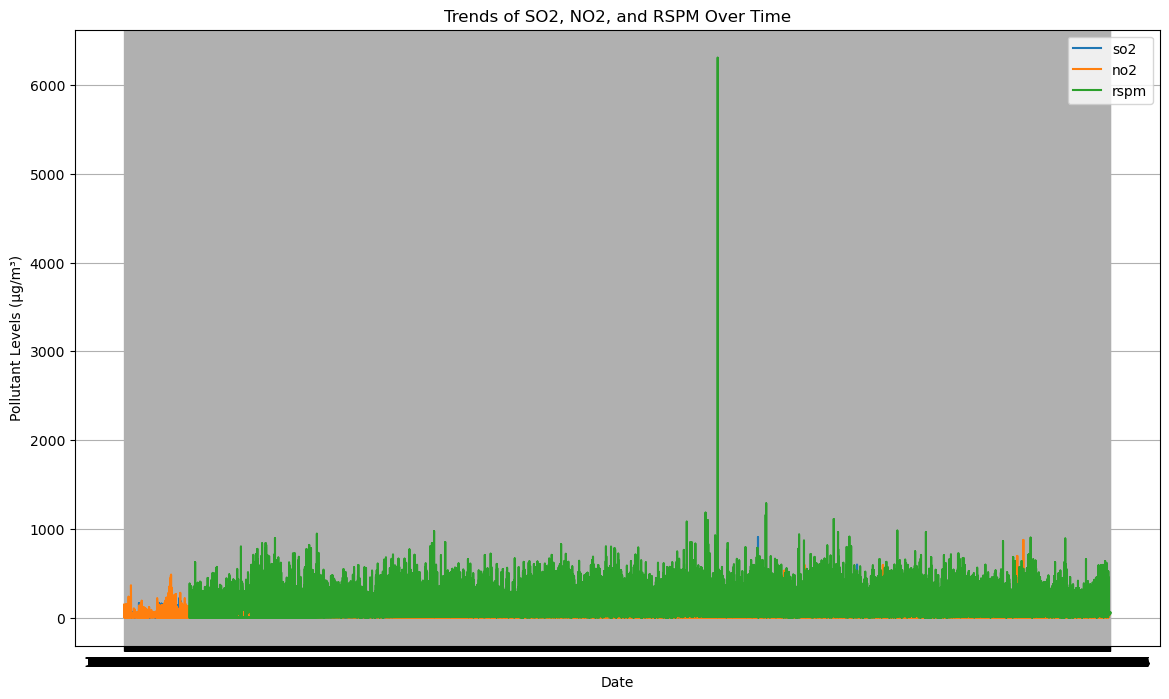

In [7]:
pollutants = ['so2', 'no2', 'rspm']
plt.figure(figsize=(14, 8))

for pollutant in pollutants:
    df_pollutant = df[['date', pollutant]].dropna().sort_values(by='date')
    plt.plot(df_pollutant['date'], df_pollutant[pollutant], label=pollutant)

plt.title('Trends of SO2, NO2, and RSPM Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels (µg/m³)')
plt.legend()
plt.grid()
plt.show()


7


C:\Users\hp\AppData\Local\Temp\ipykernel_9552\2502918081.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['date'].dt.to_period('M')


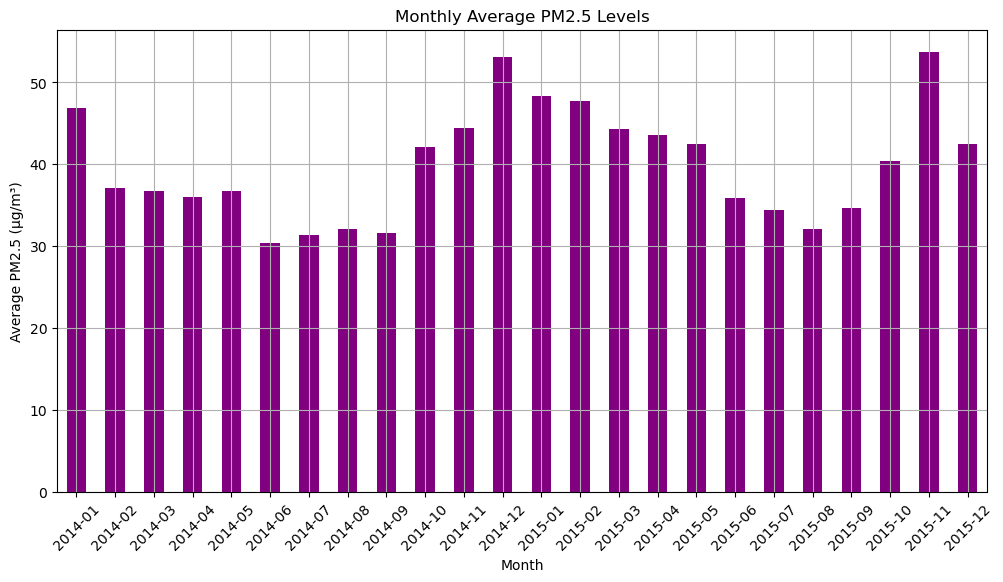

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if there are any non-datetime values
print(df['date'].isnull().sum())  # This will show how many dates could not be converted

# Drop rows with NaT (Not a Time) in the 'date' column
df = df.dropna(subset=['date'])

# Create a new column for 'year_month' for grouping
df['year_month'] = df['date'].dt.to_period('M')

# Calculate the mean PM2.5 for each month
monthly_pm25 = df.groupby('year_month')['pm2_5'].mean().dropna()

# Plotting
plt.figure(figsize=(12, 6))
monthly_pm25.plot(kind='bar', color='purple')
plt.title('Monthly Average PM2.5 Levels')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


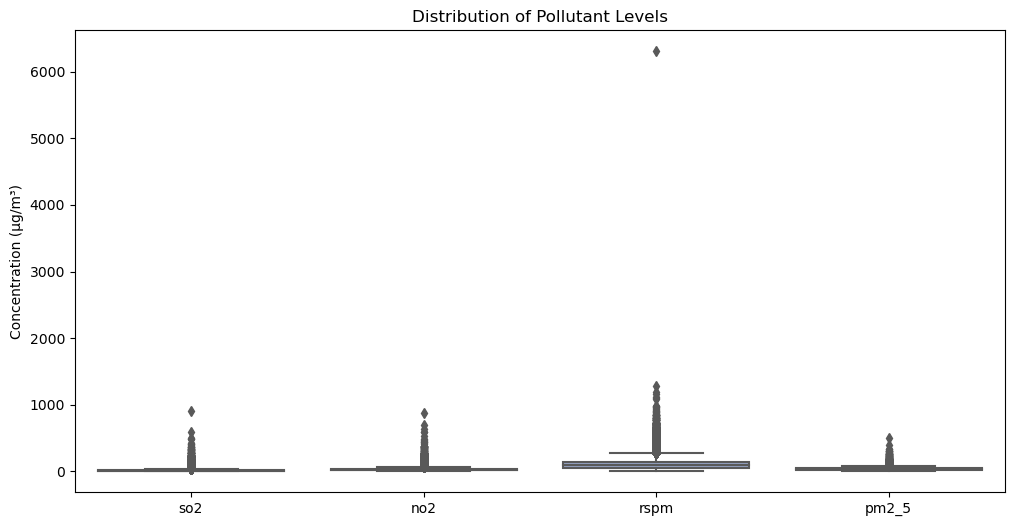

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['so2', 'no2', 'rspm', 'pm2_5']], palette='Set2')
plt.title('Distribution of Pollutant Levels')
plt.ylabel('Concentration (µg/m³)')
plt.show()


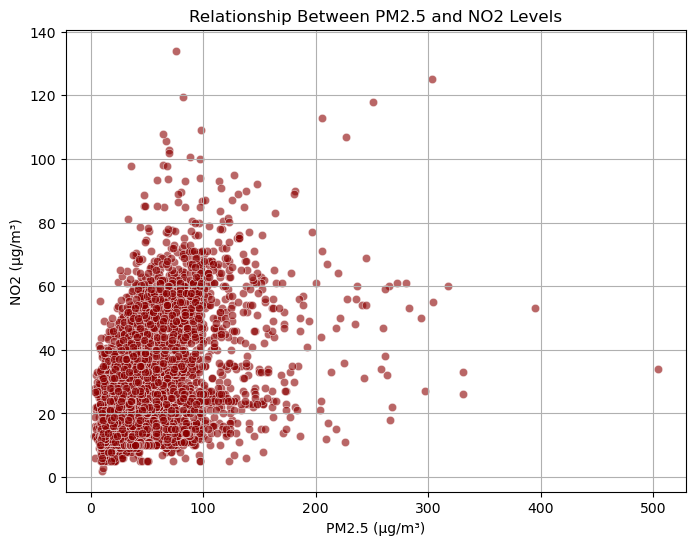

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pm2_5', y='no2', data=df, alpha=0.6, color='darkred')
plt.title('Relationship Between PM2.5 and NO2 Levels')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.grid()
plt.show()
